In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

import acquire
import prepare

# plotting defaults
plt.rc('figure', figsize=(11, 5))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [7]:
df = acquire.superstore()

In [8]:
df.shape

(913000, 14)

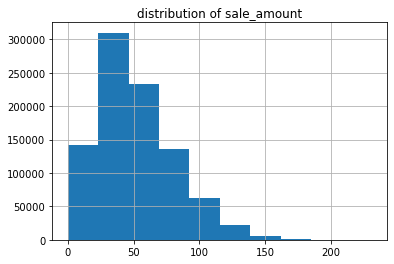

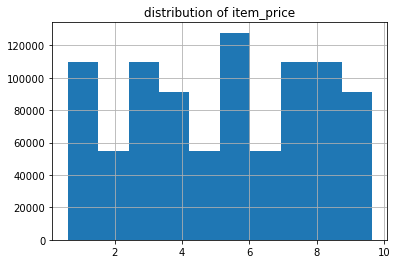

In [9]:
df = prepare.prepare_store(df)

In [11]:
df.index.max()

Timestamp('2017-12-31 00:00:00')

In [12]:
df.index.min()

Timestamp('2013-01-01 00:00:00')

In [13]:
# Human-Based  Train-Test split ******.loc includes the endpoint of the range!!!!!!*******
train = df.loc[:'2015']
test = df.loc['2017':]

In [17]:
train.head(1)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday,10.92


In [31]:
vals = ['sale_amount', 'item_id', 'item_price', 'month', 'day_of_week', 'sales_total']

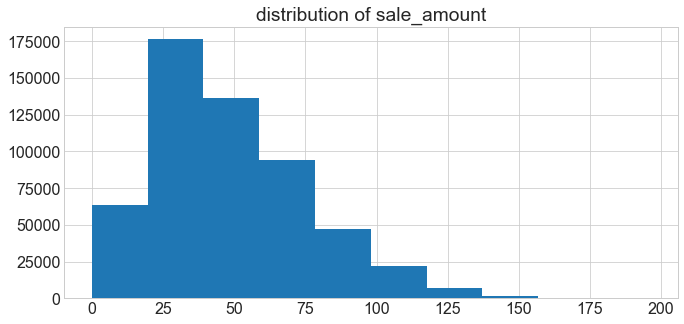

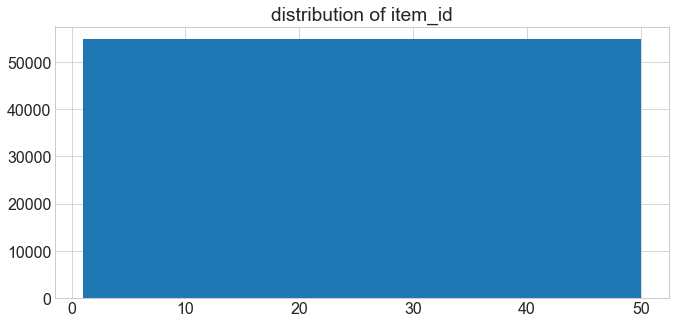

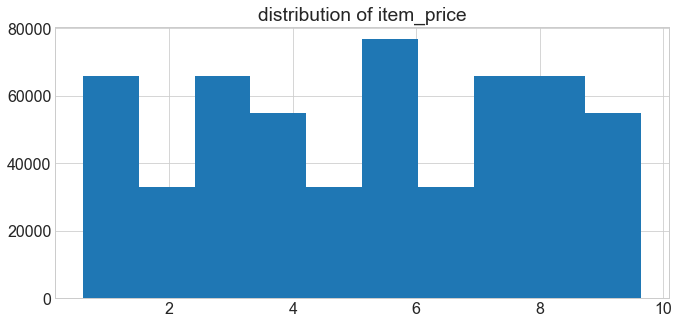

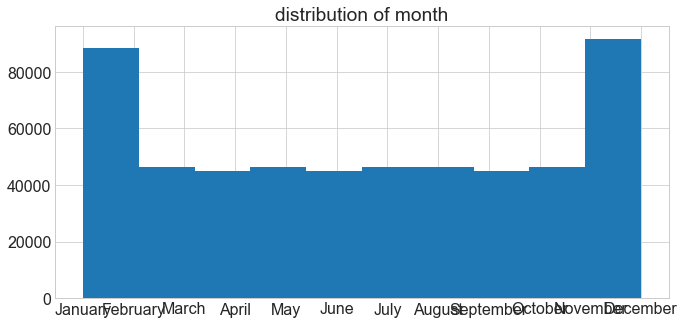

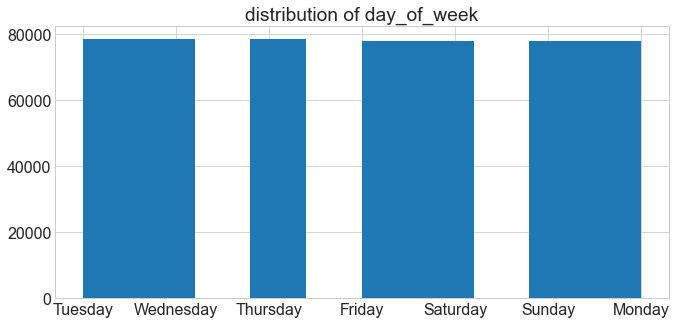

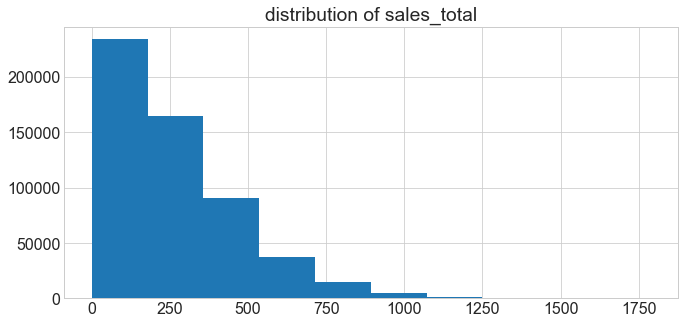

In [36]:
for val in vals:
    train[val].hist()
    plt.title(f'distribution of {val}')
    plt.show()

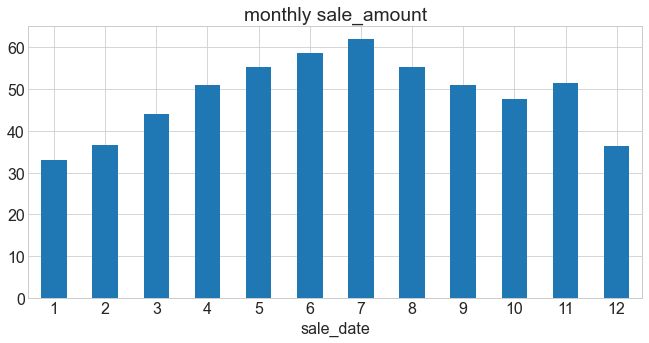

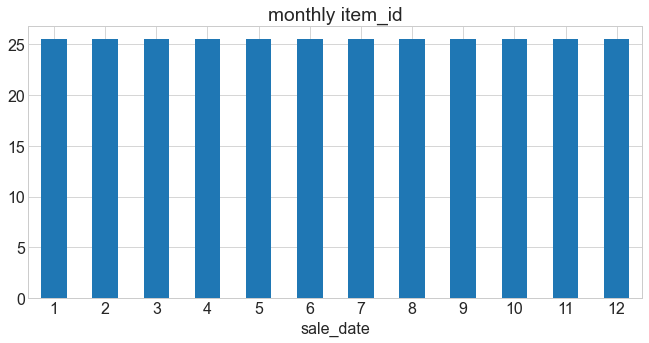

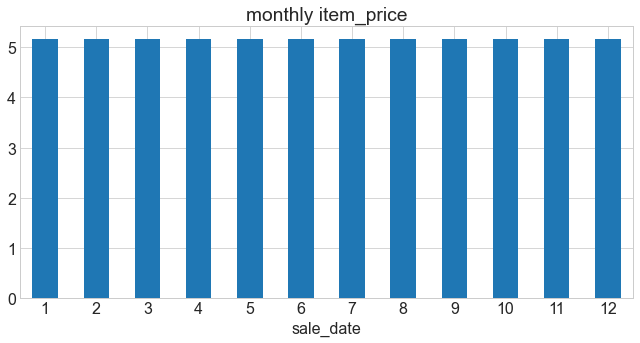

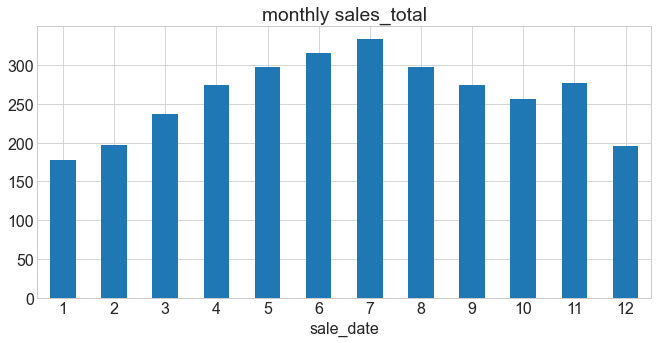

In [45]:
vals = ['sale_amount', 'item_id', 'item_price', 'sales_total']
for val in vals:
    train.groupby(train.index.month)[val].mean().plot.bar().tick_params('x', rotation=0)
    plt.title(f'monthly {val}')
    plt.show()

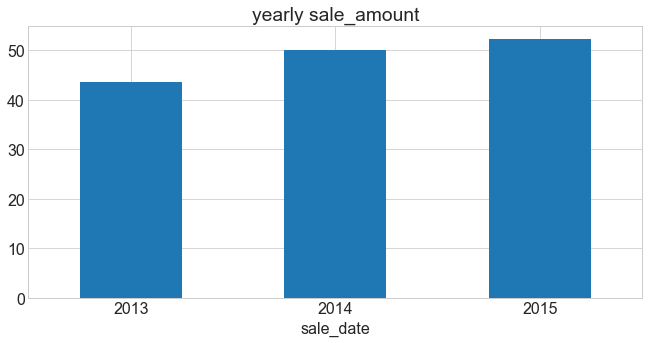

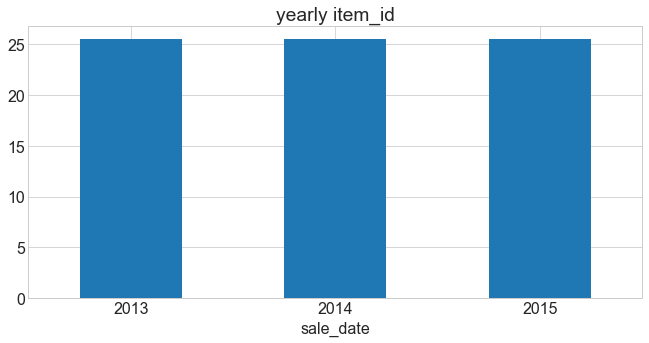

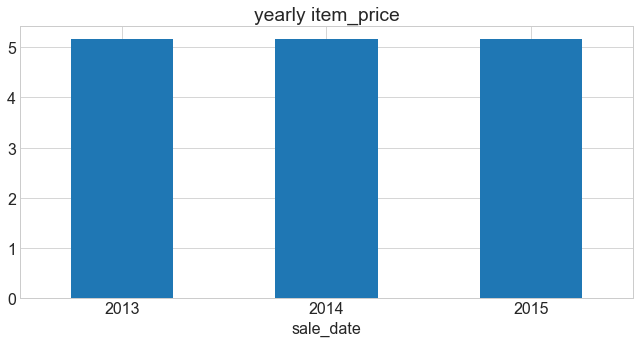

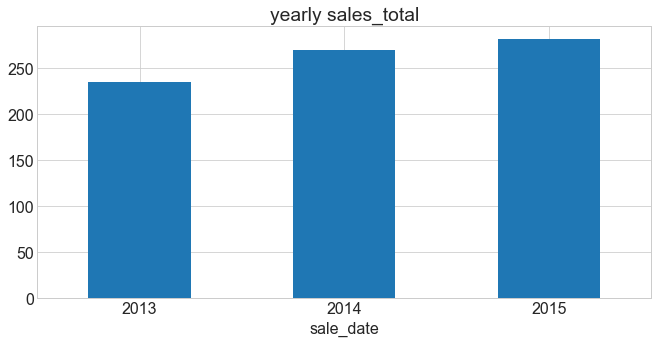

In [46]:
vals = ['sale_amount', 'item_id', 'item_price', 'sales_total']

for val in vals:
    train.groupby(train.index.year)[val].mean().plot.bar().tick_params('x', rotation=0)
    plt.title(f'yearly {val}')
    plt.show()

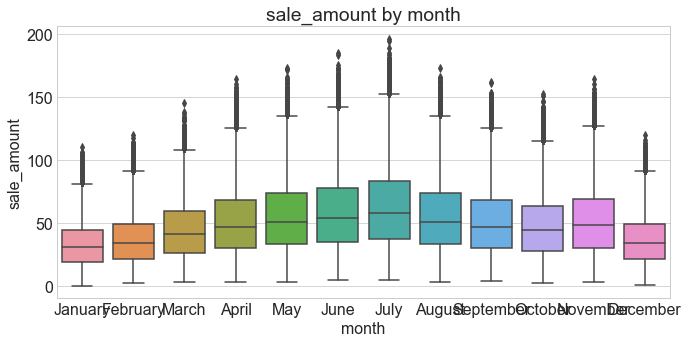

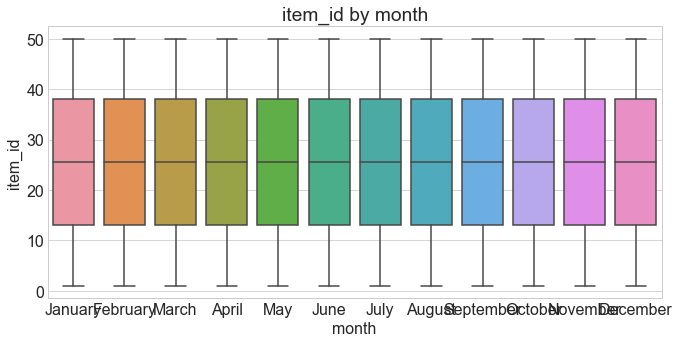

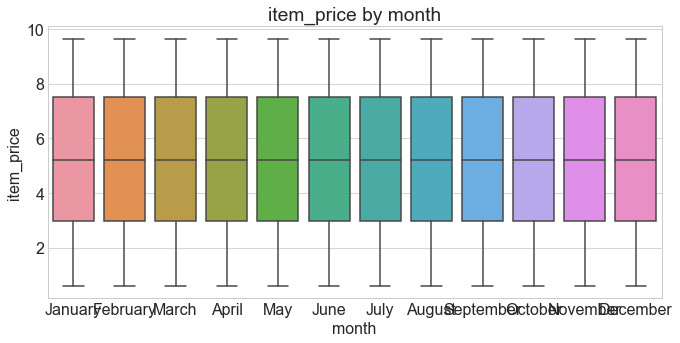

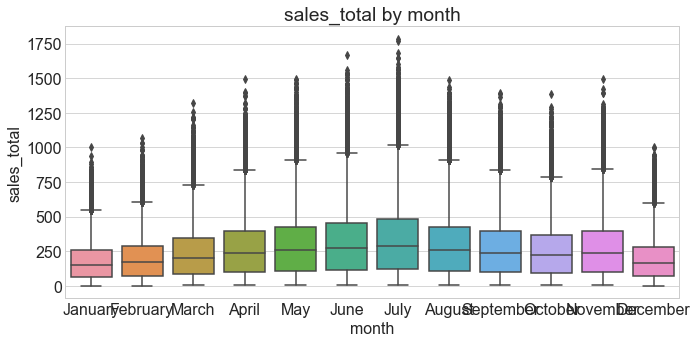

In [48]:
for val in vals:
    sns.boxplot(data=train, y=val, x='month')
    plt.title(f'{val} by month')
    plt.show()

In [52]:
items = train.item_id.unique()

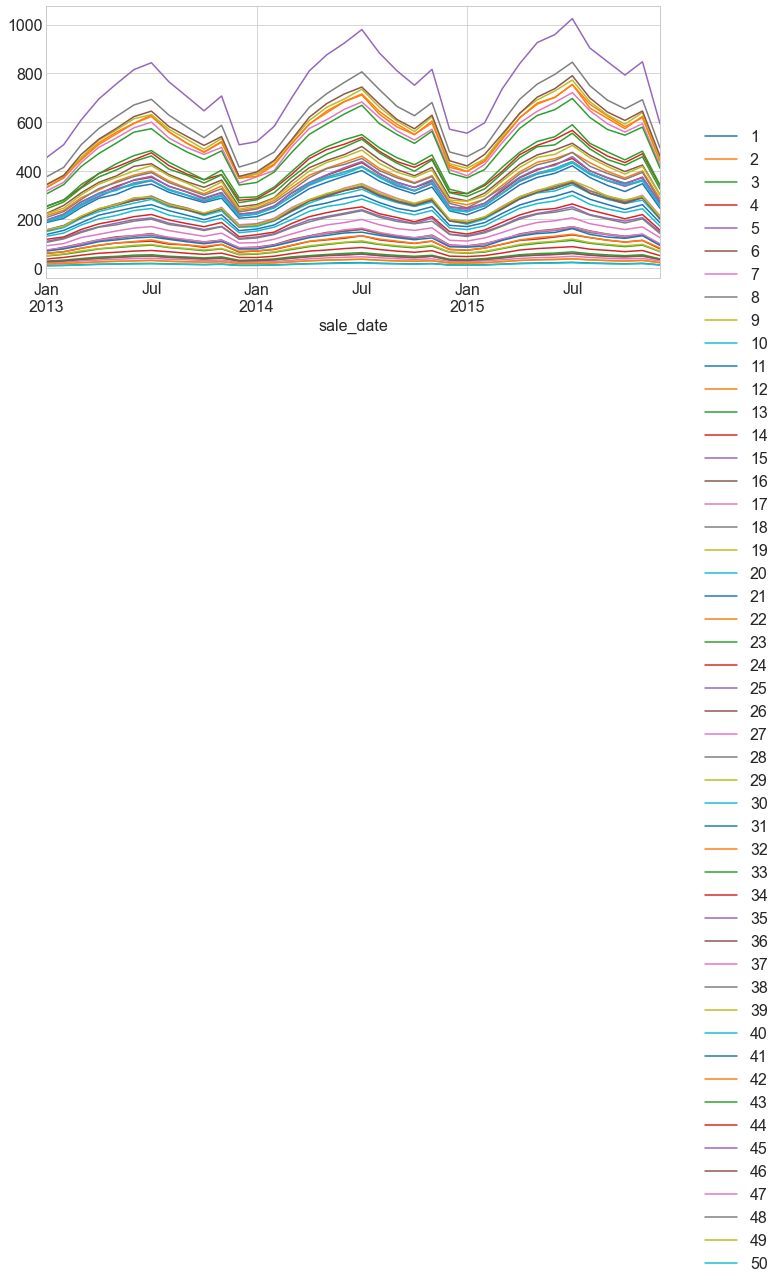

In [70]:
for item in items:
    train[train.item_id == item].sales_total.resample('M').mean().plot()
plt.legend(items,bbox_to_anchor=(1.05, 0.6))

plt.show()

In [ ]:
# items sell at the same rate seasonally, with a slight year-on-year increase

In [1]:
stores = train.store_id.unique()

for store in stores:
    train[train.store_id == store].sales_total.resample('M').mean().plot()

plt.show()

NameError: name 'train' is not defined

In [71]:
# stores maintain the same portion of total sales throughout the observed period

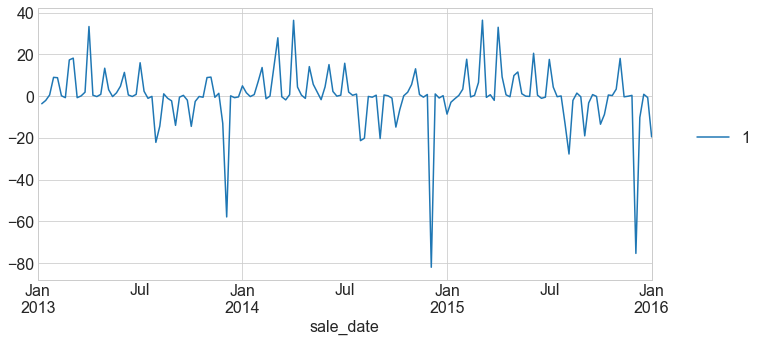

In [76]:
train.sales_total.resample('W').mean().diff().plot()
plt.legend(stores,bbox_to_anchor=(1.05, 0.6))
plt.show()